<a href="https://colab.research.google.com/github/meburns2011/Heart-Disease-Predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Dataset was entered from phone surveys across the united states. Most of the sections have been scaled down to a single digit by the surveyors that the patients could pick from. Here are the descriptions:
#Age

1 Age 18 to 24

2 Age 25 to 29

3 Age 30 to 34

4 Age 35 to 39

5 Age 40 to 44

6 Age 45 to 49

7 Age 50 to 54

8 Age 55 to 59

9 Age 60 to 64

10 Age 65 to 69

11 Age 70 to 74

12 Age 75 to 79

13 Age 80 or older

#Education
1 Never attended school or only kindergarten

2 Grades 1 through 8 (Elementary)

3 Grades 9 through 11 (Some high school)

4 Grade 12 or GED (High school graduate)

5 College 1 year to 3 years (Some college or technical school)

6 College 4 years or more (College graduate)

#Household Income
1 Less than $10,000

2 Less than $15,000 ($10,000 to less than $15,000)

3 Less than $20,000 ($15,000 to less than $20,000)

4 Less than $25,000 ($20,000 to less than $25,000)

5 Less than $35,000 ($25,000 to less than $35,000)

6 Less than $50,000 ($35,000 to less than $50,000)

7 Less than $75,000 ($50,000 to less than $75,000)

8 $75,000 or more

#General Health
1 Excellent

2 Very Good

3 Good

4 Fair

5 Poor

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
heart_disease = '/content/diabetes_binary_5050split_health_indicators_BRFSS2015.xlsx'
df = pd.read_excel(heart_disease)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37,0,0,0,0,0,...,1,0,4,0,0,0,0,6,4,1
70688,1,0,1,1,29,1,0,1,0,1,...,1,0,2,0,0,1,1,10,3,6
70689,1,1,1,1,25,0,0,1,0,1,...,1,0,5,15,0,1,0,13,6,4
70690,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

Just glancing at this heatmap doesn't show any strong correlations between any of the columns. There's a weak correlation between physical health, difficulty walking and General Health which is expected.

In [ ]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [7]:
df=df.drop_duplicates()

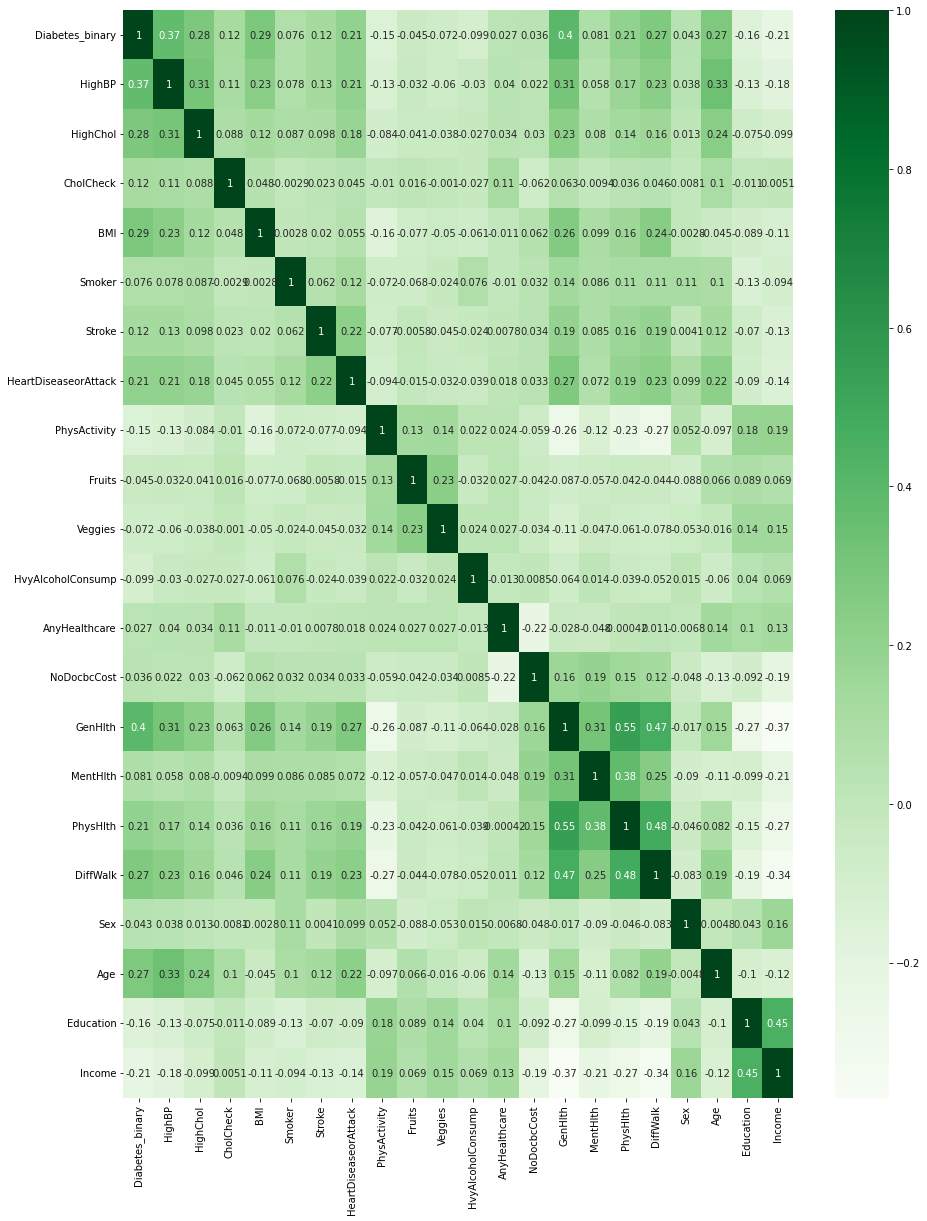

In [4]:
plt.figure(figsize=(15,20))
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

In [8]:
#I'm going to drop the veggies and fruits columns because they only slightly correlate with each other. 
#The data was collected through phone surveys so there is likely some overexaggeration from about how much or often the people being interviewed
# eat fruits and veggies making it unnecessary
df=df.drop(columns=['Fruits','Veggies'])

In [ ]:
#Checking for outliers
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.043515,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.204014,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1a18e90>]],
      dtype=object)

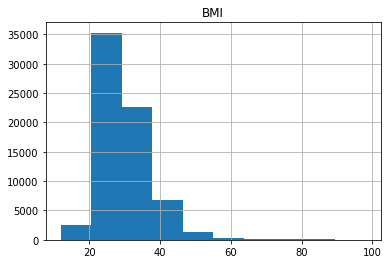

In [ ]:
df.hist('BMI')

In [ ]:
#checking for outliers. Nothing unreasonable was found
df.value_counts('BMI')

BMI
27    6118
26    4801
28    4452
30    4282
24    4168
      ... 
85       1
86       1
78       1
74       1
12       1
Length: 80, dtype: int64

Average BMI is between 18.5 and 24.9. Most of the patients in this data set are above the average but the majority only slightly. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1a18d10>]],
      dtype=object)

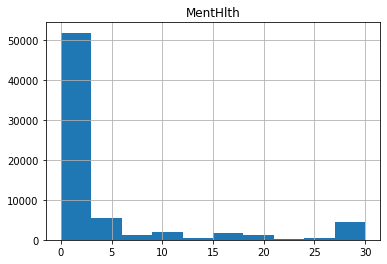

In [ ]:
df.hist('MentHlth')

In [ ]:
#checking for outliers, nothing unreasonable found
df.value_counts('MentHlth')

MentHlth
0     46485
30     4320
2      3251
5      2518
1      2041
3      1965
10     1924
15     1767
20     1125
4       981
7       825
25      425
14      353
6       288
8       198
12      130
28       99
21       84
29       53
18       42
16       28
9        28
22       22
17       18
26       17
27       17
13       15
23       13
24       10
11        8
19        7
dtype: int64

#Mental Health
how many days during the pasyt 30 days has your mental health been not good?

Most people said 0 to 3 but there are a few outliers with all 30 days feeling poorly. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae18ddf10>]],
      dtype=object)

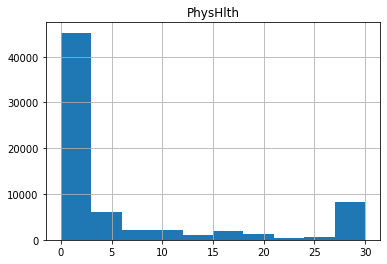

In [ ]:
df.hist('PhysHlth')

#Physical Health
How many days over the past 30 days has your physical health been not good? This question and Mental Health and Physical Health had a weak correlation but we see the same spread of mostly good health with some bad health outliers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae195d210>]],
      dtype=object)

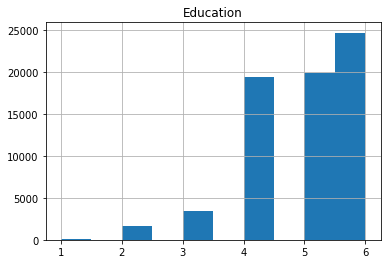

In [ ]:
df.hist('Education')

Most of our patients are educated people and have been to college.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae177d690>]],
      dtype=object)

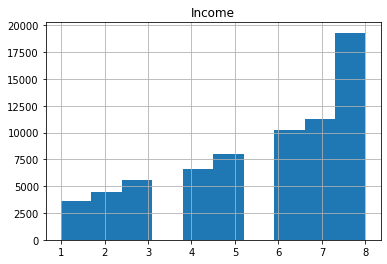

In [ ]:
df.hist('Income')

MOst households make at least 75k a year. 

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.043515,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.204014,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae163ba10>]],
      dtype=object)

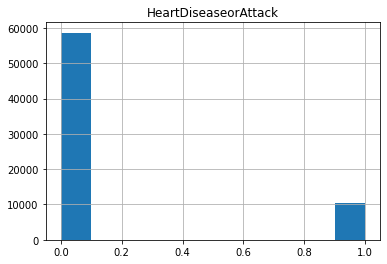

In [ ]:
df.hist('HeartDiseaseorAttack')

The majority in this dataset have not had a heart attack or been diagnosed with heart disease.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae14acfd0>]],
      dtype=object)

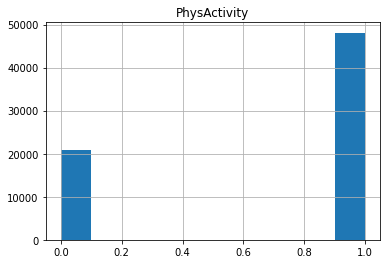

In [ ]:
df.hist('PhysActivity')

#Physical Activity
have you done any physical activity during the last 30 days?
Most people say yes but this doesn't tell us what kind of physical activity, how often or how aggressive the activity was.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1489890>]],
      dtype=object)

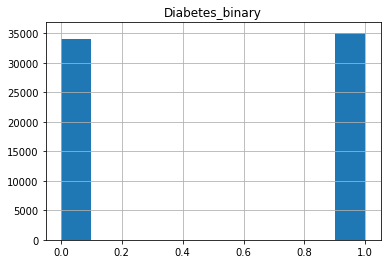

In [ ]:
df.hist('Diabetes_binary')

#Diabetes
Have you beeen diagnosed by a doctor with diabetes?
Pretty even between yes and no.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae13d9fd0>]],
      dtype=object)

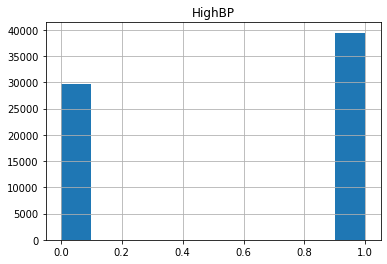

In [ ]:
df.hist('HighBP')

#High  BLood Pressure
HAve you been told by a doctor that you have high blood pressure?
Close to even but more people did have high blood pressure. Since this survey was taken, what is considered to be a high blood pressure has been lowered. It would be interesting to see how much the answer to this question has changed. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae13da790>]],
      dtype=object)

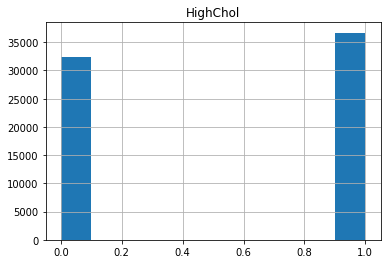

In [ ]:
df.hist('HighChol')

#Cholesterol
HAve you been told by a doctor that you have high cholesterol?
Very similar to the high blood pressure stats. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1267810>]],
      dtype=object)

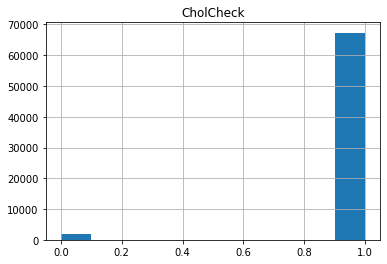

In [ ]:
df.hist('CholCheck')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1214b10>]],
      dtype=object)

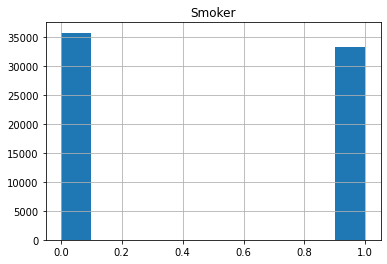

In [ ]:
df.hist('Smoker')

#Smoker
Have you smoked at least 5 packs of cigarrettes in your entire life?
I'm not sure why this question is so harsh? 5 packs during 60 years of life doesn't seem all that ridiculous. Especially knowing that it only takes 3 months since the last cigarette for your lungs to start healing. I don't think this section will offer anything to the predictions so I will be deleting this column.

In [ ]:
df=df.drop(columns='Smoker')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1266590>]],
      dtype=object)

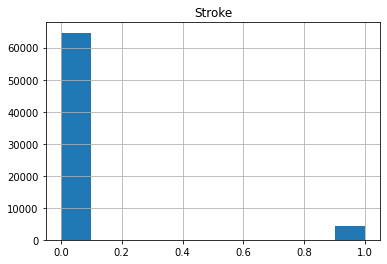

In [ ]:
df.hist('Stroke')

#Stroke
most patients have not have a stroke which is excellent considering half of the patients had high blood pressure. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae11d6690>]],
      dtype=object)

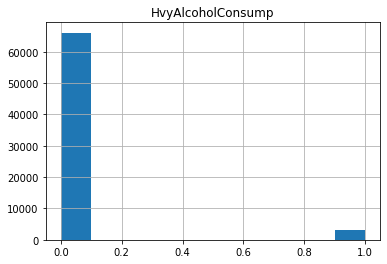

In [ ]:
df.hist('HvyAlcoholConsump')

#Alcohol Consumption
described as adult males having more than 14 drinks per week and adult females having more than 7 drinks per week. 
Most people reported not heavily drinking. But like the fruits and veggies I don't think all the people surveyed were being completely honest. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1196e50>]],
      dtype=object)

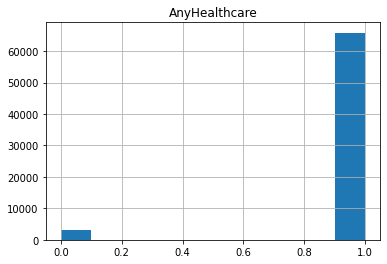

In [ ]:
df.hist('AnyHealthcare')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0fe9c10>]],
      dtype=object)

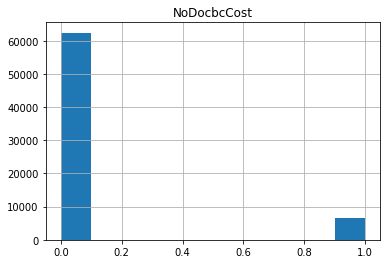

In [ ]:
df.hist('NoDocbcCost')

Most patients fell under income of at least 50,000 so it makes sense that most of these patients have healthcare and are seeing a doctor. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0f85c10>]],
      dtype=object)

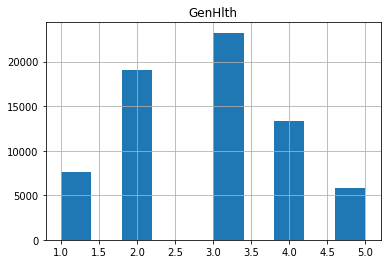

In [ ]:
df.hist('GenHlth')

Most said very good or good. However a suprising amount admitted that they thought their general health was fair or poor which brings the physical activity section back into question. I'm sure if there were more detailed responses available we would see that a large section of patients were only active once or twice a week.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0ee58d0>]],
      dtype=object)

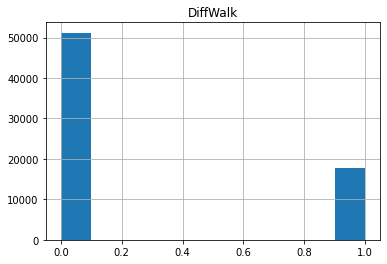

In [ ]:
df.hist('DiffWalk')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0e20790>]],
      dtype=object)

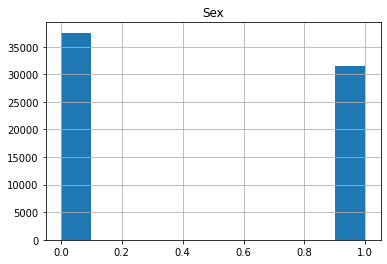

In [ ]:
df.hist('Sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0dab690>]],
      dtype=object)

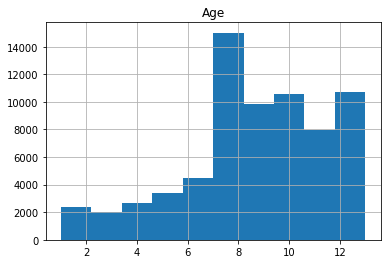

In [ ]:
df.hist('Age')

#Age
most patients were at least in their 60s.

##Explanatory Visuals

In [17]:
smoker_heart=df.groupby(['HeartDiseaseorAttack'])['Smoker'].value_counts(normalize=True)

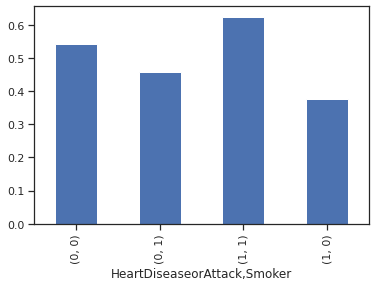

In [18]:
smoker_heart.plot.bar()

~This bar plot shows the correlation between smokers and the likelihood of a heart attack. The survey asked people if they had smoked 5 packs of cigarettes at all in their life. If yes they are counted as a smoker if no they are not. A higher percentage of the people who did suffer from a heart attack or heart disease were identified as smokers. However, slightly less than half of the people who didn't suffer from heart attack or disease were also counted as smokers. 

~From a scientific stand point this isn't enough to say that smoking leads to heart disease or attack but it does mean that further research is needed. For example narrowing the question of whether or not someone is a smoker. Perhaps ask if they have smoked 5 packs of cigarettes within the last two years or first ask if they consider themselves a smoker at all and if they say yes then branch into detailed questions about how many cigarettes have they smoked within a certain amount of time. 

~With the information as we have it now we could be considering someone who is in their 40s a smoker when they haven't smoked any cigarettes since their early 20s. Their body has likely recovered from the damage smoking gave them and are no longer in danger of a heart attack and their data is skewing our results. 

In [23]:
phys_bp=df.groupby(['PhysActivity'])['HighBP'].value_counts(normalize=True)

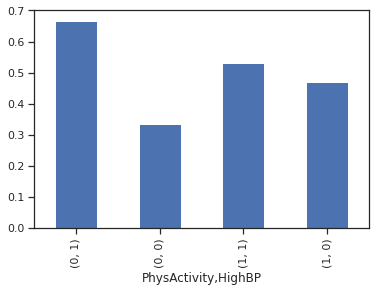

In [24]:
phys_bp.plot.bar()

In this bar plot we can see a correlation between physical activity and high blood pressure. 0 in this case means that the patient does not participate in physical activity or does not have high blood pressure. 

Most of the people who are not physically activie have high blood pressure. However, more than half of the people who are physically active also have high blood pressure. Since this is from a phone survey there could be some dishonesty from the people answering the questions. Or the people who do have high blood pressure are just getting started on their fitness journey. I think this does call for more data. What kind of physical activity are these people doing? Does it differ from the people who don't have high blood pressure? Or is there another factor in high blood pressure that we haven't seen yet in this data set?

##Clustering Models

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

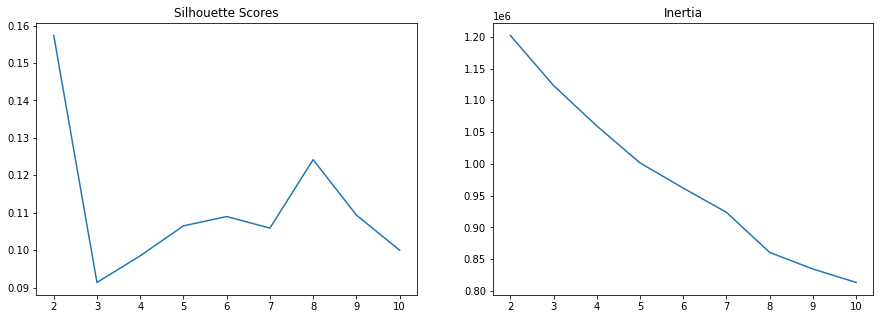

In [11]:
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_df)
  sils.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [12]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_df)

df['cluster'] = kmeans.labels_
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,cluster
0,0,1,0,1,26,0,0,0,1,0,...,0,3,5,30,0,1,4,6,8,4
1,0,1,1,1,26,1,1,0,0,0,...,0,3,0,0,0,1,12,6,8,6
2,0,0,0,1,26,0,0,0,1,0,...,0,1,0,10,0,1,13,6,8,4
3,0,1,1,1,28,1,0,0,1,0,...,0,3,0,3,0,1,11,6,8,2
4,0,0,0,1,29,1,0,0,1,0,...,0,2,0,0,0,0,8,5,8,4


In [13]:
scaled_df.shape


(69057, 20)

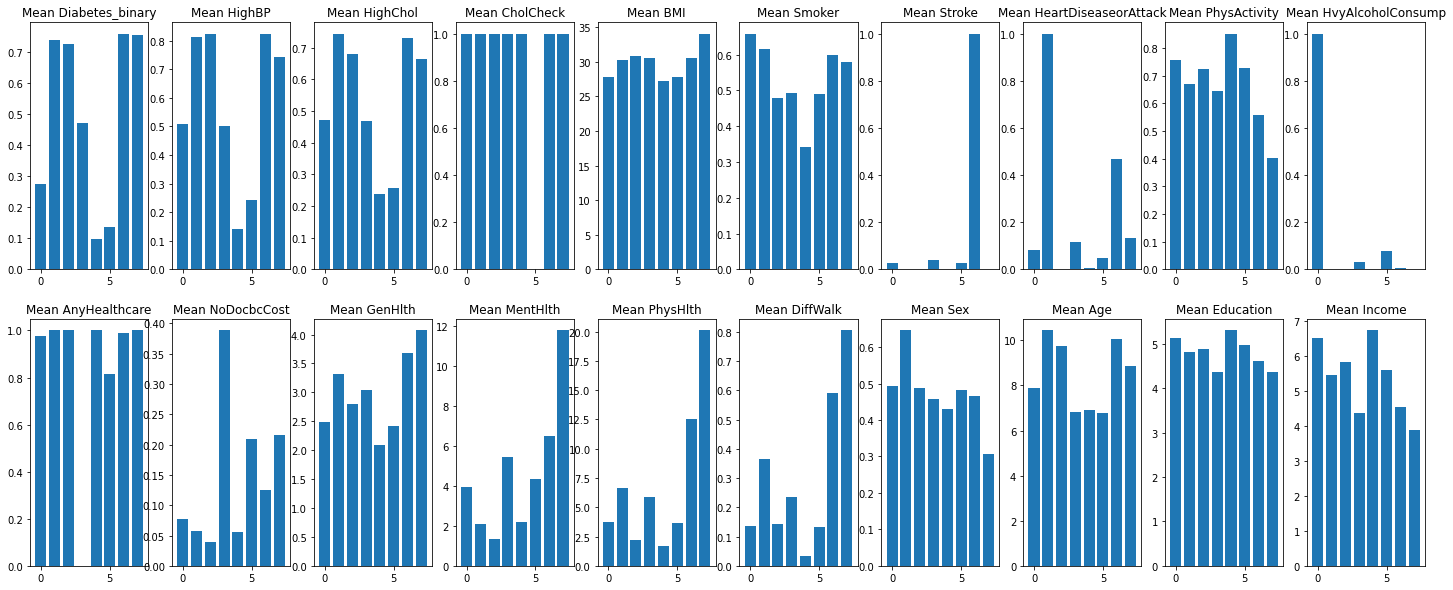

In [14]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

fig, axes = plt.subplots(2,10, figsize = (25, 10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#Analysis of Kmeans Clusters


Cluster0= More than half of them do not have diabetes but a majority still have high blood pressure and high cholesterol. They all have been asked by a doctor to check their cholesterol, have a high BMI and are smokers. None of them have had a stroke and a very small percentage have had a heart attack or heart disease. Most have reported being physically active and have having healthcare. All have reported heavy alcohol consumption and a little more than half have reported good general health. Most have reported good mental and physical health. Most do not have a protblem walking depsite being in the older demography of patients. high education and high income.  These are people who regularly get check ups from their doctor. They most likely have heavy alcohol consumption from social events. These are people who are average in health consiousness but are honest with themselves about hwo theyre eating and living.



Cluster1= Most of these people have been diagnosed with diabetes and high blood pressure, cholesterol, BMI and most of them are considered smokers. None of them have suffered from a stroke but all of them have suffered from a heart attack or heart disease. They have mostly good physical activity and no heavy alcohol consumption. They all have healthcare and have good general, mental and physical health. Some have difficulty walkingand most are men. THey are the oldest cluster. These are the target group. We want to look at their patterns especially to find those patterns in new patients. 



Cluster2= This cluster is very close the cluser 0 but with less people considered smokers. They have zero instances of heart attack or disease. Good general and phjysical health and the best mental health. They are older. The biggest difference in this cluster and cluster 0 is that they are not smokers but do have diabetes and high blood pressure.



Cluster3= Diabetes, high blood pressure and cholesterol are a little more than half. They have only a slight chance of stroke and heart disease or attack. No heavy alcohol consumption. They have no healthcare good general and physical health but a higher chance of poor mental health. They are younger, have slightly less education and the second lowest income. These are probably people who have just entered the work force and low income with no healthcare is affecting their mental health. 


Cluster 4= This cluster has the lowest in diabetes diagnosis, high blood pressure and high cholesterol. THey have the lowest BMI and the lowest amount smokers. No risk of stroke. Low risk of heart disease or attack. THey have the highest physical activity and the lowest alcolhol consumption. However general health is the lowest. Mental and physical health are both good. They have the least difficulty wealking, are young but have the highest education and income. These people are go getters and health conscious. There is some confusion in the general health section. They could be either the most honest about general health of all the clusters or down playing their feelings. 



Cluster 5= This is very close to cluster 4 but with slightly worse general, mental and physical health. The biggest difference is that they do not check their cholesterol. They are probably young with no health problems yet. 



Cluster6= This cluster has the most likelihood of having a stroke. Every one in this cluster has high blood pressure and diabetes and high cholesterol. Alot of them but not all are smokers. General, mental and physical health are the second highest. They are also the second oldest column. These are people who are probably facing a lot of health problems from unchecked high blood pressure for a long time. 



Cluster7= This group has the lowest income. Most of them have not suffered from heart disease, attack or a stroke. They do have the most difficulty walking, The lowest mental health, and lowest general health. These are people who are probably disabled in some way which affects their mental health and their ability to walk. They likely monitor their health constantly. 

##Prediction Models
My target for this model will be whether or not the patient suffered from a heart attack or has heart disease.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [30]:
y = df['HeartDiseaseorAttack']
X = df.drop(columns = 'HeartDiseaseorAttack')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [35]:
#Decision Tree Classifier
from sklearn.pipeline import make_pipeline
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_pipe=make_pipeline(scaler,dec_tree)
dec_pipe.fit(X_train,y_train)

dec_pipe.predict(X_train)
train_score = dec_pipe.score(X_train,y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.941651220265678
0.9400521285838401


In [36]:
#fine tuning the classification tree
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
 
pd.DataFrame(param_grid).T



scores = {}
 
#loop through all combinations of values for all hyperparameters
for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      model = DecisionTreeClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      model.fit(X_train, y_train)
      score = model.score(X_test, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100
 
#Display dictionary of scores
scores


{'depth 1, min_samples_leaf 15, min_samples_split 10 accuracy': 90.7153,
 'depth 1, min_samples_leaf 15, min_samples_split 100 accuracy': 90.7153,
 'depth 1, min_samples_leaf 15, min_samples_split 2 accuracy': 90.7153,
 'depth 1, min_samples_leaf 20, min_samples_split 10 accuracy': 90.7153,
 'depth 1, min_samples_leaf 20, min_samples_split 100 accuracy': 90.7153,
 'depth 1, min_samples_leaf 20, min_samples_split 2 accuracy': 90.7153,
 'depth 1, min_samples_leaf 3, min_samples_split 10 accuracy': 90.7153,
 'depth 1, min_samples_leaf 3, min_samples_split 100 accuracy': 90.7153,
 'depth 1, min_samples_leaf 3, min_samples_split 2 accuracy': 90.7153,
 'depth 2, min_samples_leaf 15, min_samples_split 10 accuracy': 94.0052,
 'depth 2, min_samples_leaf 15, min_samples_split 100 accuracy': 94.0052,
 'depth 2, min_samples_leaf 15, min_samples_split 2 accuracy': 94.0052,
 'depth 2, min_samples_leaf 20, min_samples_split 10 accuracy': 94.0052,
 'depth 2, min_samples_leaf 20, min_samples_split 100 

In [37]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
 
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}


dt_grid_search = GridSearchCV(model, param_grid)
dt_grid_search.fit(X_train, y_train)
dt_grid_search.best_params_

dt_grid_search.best_params_


{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [38]:
#retrieve the best version of the model
best_model = dt_grid_search.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)


0.9448595424268752

In [39]:
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

predictions = knn_pipe.predict(X_test)
predictions



array([0, 0, 0, ..., 0, 0, 0])

In [40]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.8803359397625253

In [41]:
from sklearn.decomposition import PCA
scaled_df = scaler.fit_transform(X)

In [46]:
#adding a principle component analysis
pca = PCA(n_components=.85)
pcs = pca.fit_transform(scaled_df)

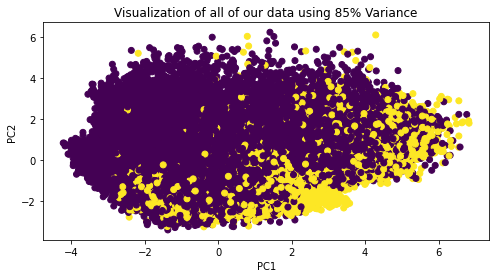

In [48]:
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using 85% Variance')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [52]:
knn2=KNeighborsClassifier(n_neighbors=5)
knn2_pipe=make_pipeline(scaler,pca,knn2)
knn2_pipe.fit(X_train, y_train)

predictions2=knn_pipe.predict(X_test)
acc_score2=knn2_pipe.score(X_test,y_test)
acc_score2

0.8744859542426875

##Final Model

My classifier tree gave a higher accuracy score than my K Nearest neighbors model. With an accuracy of 94 I would say that this model is ready for production. The kmeans clusters give an insight into the health lifestyle of the patients surveyed. From this We can understand why the people who suffered from heart disease or attack did suffer from those things. This gives doctors the ability to find red flags just from talking to patients first and starting to think about what else they should be looking for. 